# Avance II Proyecto Final 
### Equipo #3
### Grupo: 006 
### Frecuencia : Lunes, Miercoles,Viernes  6-7 pm
### Integrantes : 
* Francisco Ramon Ramirez Torres 1739900. 
* Cesar Gerardo Varela Cavazos 1748727. 
* Cesar Alejandro Barrera Martinez 1618509 



## Titulo: Video Games Sales. (Información histórica de ventas de videojuegos)

## Descripcion de la Base de Datos:

 Esta base de datos contiene toda la historia de los videojuegos lanzados en su respectivo, año fundada en una empresa en particular, con su respectiva plataforma y las ventas que ha tenido en el Norte de America, EE.UU, Japon, etc; al igual que las ventas globales que ha tenido.

## Descripcion de las columnas: 
* Contiene nombre, genero, año de publicacion, plataforma, empresa desarrolladora, ventas en Estados Unidos,Norteamerica, Japon y categoria.
* Los tipos de datos que contiene la base de datos son String, flotantes, Caracter, contando con aproximadamente 10 mil registros de los videojuegos.

## Justificacion del uso de los datos.
* a). Cuáles fueron las características que les llamó la atención de los datos. Qué les hizo querer trabajar con ellos.
    La diversa información acerca de los videojuegos, como la distribución de venta, popularidad de videojuegos, diversa variedad con géneros en los títulos de videojuegos y competencia entre empresas que tienen juegos similares en popularidad.

* b) Qué beneficio encuentran de trabajar con estos datos.
  Poder encontrar algún beneficio de manera que podemos calcular un precio estimado de un videojuego, ver un análisis de ventas sobre cómo se han visto ventas con otras empresas, podemos ver qué clase de videojuegos se han vendido más a través de los años según su aceptación para las empresas que se dedican a crear juegos puedan saber que genero es el que deben crear más.

## Preguntas de Interes
* ¿Cuál es la percepción de aceptación de videojuegos de las empresas ?

* ¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

* ¿ Como podemos ver el comportamiento (graficamente) de las empresas con sus respectivas ventas  ?

* ¿ Cual es la plataforma de videojuegos (consola) con mayores ventas de videojuegos en un genero especifico (shooter,deportes,Carreras) ?


### 1. Limpieza de datos


In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import pandas_profiling 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Franc\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* Importacion de librerias necesarias para utilizar nuestra base de datos y realizar acciones de limpieza y graficas estadisticas.

In [4]:
games = pd.read_csv("train.csv")

* Con esta variable games la usaremos para abrir nuestra BD de los videojuegos

###### a)	Mostrar los datos sin manipulación

In [35]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,0.00,NaN,NaN,NaN,NaN,Sand Grain Studios,E
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,0.32,84.0,70.0,8.1,733.0,Nintendo,E
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,0.05,53.0,6.0,6.0,8.0,Eurocom Entertainment Software,E
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,0.00,NaN,NaN,NaN,NaN,NaN,NaN


* Usamos la funcion head() para mostrar los primeros 5 registros solo para revisar si cargo correctamente

In [36]:
games.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,87.0,89.0,6.3,1454.0,Treyarch,M
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,0.22,83.0,91.0,7.8,543.0,Insomniac Games,M
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,0.01,37.0,31.0,NaN,NaN,10tacle Studios,T
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN
11702,NHL 2K9,PS3,2008.0,Sports,Take-Two Interactive,0.11,0.01,0.00,0.01,70.0,21.0,NaN,NaN,Visual Concepts,E10+


* Usamos la funcion tail() para mostrar los primeros 5 registros solo para revisar si cargo correctamente
* Como se ve con la fucion head() y tail() se muestran registros con alguno de los registros de videojuegos contando con nombres, ventas, puntuaciones, genero

In [37]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

###### b)	Eliminar columnas no deseadas.

In [139]:
games.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [6]:
games2 = games.drop_duplicates(['Name','Platform',])

In [7]:
nuevaBD = games2.drop(['User_Count', 'User_Score', 'Critic_Count','Developer','Rating','Other_Sales'], axis=1)

In [8]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,NaN
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,53.0
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,NaN
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,NaN
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,83.0
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,37.0
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,NaN


* Eliminamos algunas columnas que no nos ayudan tanto ya que muchos datos eran vacios o NaN y no nos serviria hacer analisis de datos vacios. Esto nos complicaria mas hacer analisis y agregar valores para los datos de columnas faltantes lo que es mejor eliminarlas para evitar problemas y no utilizar valores falsos o inventados y puedan afectar estadisticas.

* Anteriormente se tenia contemplado la columna RATING, pero como el numero de datos NaN era demasiado 4760,se tenia contemplado usar la clasificacion RP que ERSB (Entertainment Software Rating Board) se califica como Calificacion Pendiente, lo cual para 4760 juegos con calificacion pendiente seria un dato que no serviria ya que solo se usa para evaluacion corta o despues de lanzar version oficial o version final, el cual los juegos demuestran ventas es decir que ya son versiones finales o oficiales. Lo cual fue el motivo de eliminacion.

###### c)	Correcta manipulación de los datos nulos dentro de la base de datos.

In [140]:
nuevaBD.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       1
dtype: int64

In [59]:
nuevaBD = nuevaBD.fillna(70)

Un solo dato presenta NaN en Critic_Score lo cual le asignamos uno ya que solo es un dato, y podemos tener nuestra base de datos limpia de datos vacios y de errores.

In [60]:
nuevaBD

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,0.04,0.00,0.00,84.0
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2.30,1.34,1.27,84.0
2,Robots,PS2,2005.0,Action,Vivendi Games,0.18,0.14,0.00,53.0
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0.00,0.00,0.35,69.0
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0.00,0.00,0.04,69.0
...,...,...,...,...,...,...,...,...,...
11698,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,87.0
11699,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,0.64,0.57,0.05,83.0
11700,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,0.15,0.00,0.00,37.0
11701,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0.00,0.00,0.03,70.0


In [47]:
nuevaBD.to_csv('Videojuegos.csv', index=False)

Ya tenemos nuestra base de datos nueva y guardada ya con datos que pueden ser utilizados para trabajar con ellos.

In [2]:
games2 = pd.read_csv("Videojuegos.csv")

In [3]:
games2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
0,Rapala Trophies,PSP,2006.0,Sports,Activision,40000,0,0,47
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2300000,1340000,1270000,82
2,Robots,PS2,2005.0,Action,Vivendi Games,180000,140000,0,93
3,Hamster Club 3,GBA,2002.0,Simulation,Jorudan,0,0,350000,66
4,Formula 1 06,PS2,2006.0,Racing,Sony Computer Entertainment,0,0,40000,71
...,...,...,...,...,...,...,...,...,...
11694,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9700000,3680000,110000,95
11695,Resistance 3,PS3,2011.0,Shooter,Sony Computer Entertainment,640000,570000,50000,49
11696,Ready 2 Rumble Revolution,Wii,2009.0,Sports,Atari,150000,0,0,95
11697,Monster Hunter Frontier Online: Forward 2,X360,2011.0,Role-Playing,Capcom,0,0,30000,75


Mostramos la nueva Base de Datos con columnas y datos que no servirian, asi que se puede crear una mejor visualizacion de datos sin tener errores ni nombres repetidos de videjuegos

In [4]:
Capcom = games2[games2['Publisher']=='Capcom']

In [5]:
Capcom_acccion = games2[games2['Genre']=='Action']

In [6]:
SNK = games2[games2['Publisher']=='SNK']

In [7]:
Rockstar = games2[games2['Publisher']=='Take-Two Interactive']

In [8]:
EA  = games2[games2['Publisher']=='Electronic Arts']

In [9]:
 Nintendo= games2[games2['Publisher']=='Nintendo']

In [10]:
Deportes  = games2[games2['Genre']=='Sports']

In [11]:
Accion = games2[games2['Genre']=='Action']

In [12]:
Carreras = games2[games2['Genre']=='Racing']

In [13]:
Rol =games2[games2['Genre']=='Rol-Playing']

In [14]:
Disparos = games2[games2['Genre']=='Shooter']

In [15]:
Peleas = games2[games2['Genre']=='Fighting']

Creamos algunas clases en las cuales se pueden dividir nuestros generos y empresas para despues estudiarlos y analizarlos graficamente.

In [16]:
Capcom

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
54,DuckTales: Remastered,PC,2013.0,Action,Capcom,0,10000,0,67
57,Resident Evil Director's Cut,PS3,2006.0,Action,Capcom,0,0,50000,83
168,Dead Rising 2: Off the Record,PC,2011.0,Action,Capcom,40000,20000,0,64
192,Bombastic,PS2,2002.0,Puzzle,Capcom,30000,20000,0,51
274,Mega Man Battle Network,GBA,2001.0,Role-Playing,Capcom,140000,50000,220000,82
...,...,...,...,...,...,...,...,...,...
11578,Mega Man Xtreme 2,GB,2001.0,Platform,Capcom,0,0,70000,63
11592,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,20000,0,0,74
11598,Sengoku Basara: Chronicle Heroes,PSP,2011.0,Action,Capcom,0,0,160000,71
11639,Phoenix Wright: Ace Attorney - Justice for All,DS,2006.0,Adventure,Capcom,210000,40000,260000,59


In [17]:
Disparos

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
7,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007.0,Shooter,THQ,10000,40000,0,54
15,Cold Winter,PS2,2005.0,Shooter,Vivendi Games,60000,40000,0,90
28,Call of Duty: Ghosts,XOne,2013.0,Shooter,Activision,1880000,770000,0,60
39,Max Payne,XB,2001.0,Shooter,Take-Two Interactive,980000,190000,0,52
48,SD Gundam Force: Showdown!,PS2,2004.0,Shooter,Namco Bandai Games,20000,10000,0,45
...,...,...,...,...,...,...,...,...,...
11684,Mercenaries 2: World in Flames,PS3,2008.0,Shooter,Electronic Arts,290000,390000,20000,97
11687,Chili Con Carnage,PSP,2007.0,Shooter,Eidos Interactive,0,10000,0,88
11689,Star Wars Jedi Knight II: Jedi Outcast,GC,2002.0,Shooter,Activision,180000,50000,0,47
11694,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9700000,3680000,110000,95


In [18]:
Rockstar

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
39,Max Payne,XB,2001.0,Shooter,Take-Two Interactive,980000,190000,0,52
58,Midnight Club II,XB,2003.0,Racing,Take-Two Interactive,420000,60000,0,50
73,Fantastic Four: Rise of the Silver Surfer,Wii,2007.0,Action,Take-Two Interactive,40000,10000,0,75
120,Ford Mustang: The Legend Lives,XB,2005.0,Racing,Take-Two Interactive,70000,20000,0,82
153,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,Take-Two Interactive,190000,0,0,93
...,...,...,...,...,...,...,...,...,...
11645,Royal Palace of White Sword and The City of Ge...,PC,2009.0,Role-Playing,Take-Two Interactive,0,20000,0,54
11652,The Darkness II,PC,2012.0,Shooter,Take-Two Interactive,100000,30000,0,80
11654,Serious Sam II,PC,2005.0,Shooter,Take-Two Interactive,0,10000,0,52
11674,NBA 2K7,PS2,2006.0,Sports,Take-Two Interactive,650000,20000,0,44


In [19]:
EA

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
8,Madden NFL 2003,XB,2002.0,Sports,Electronic Arts,670000,20000,0,75
30,Tiger Woods PGA Tour 2004,PS2,2003.0,Sports,Electronic Arts,1180000,340000,0,89
34,Command & Conquer: Red Alert 3 Ultimate Edition,PS3,2009.0,Strategy,Electronic Arts,140000,150000,0,80
50,FaceBreaker,X360,2008.0,Fighting,Electronic Arts,150000,20000,0,67
59,Triple Play 2002,XB,2002.0,Sports,Electronic Arts,190000,50000,0,54
...,...,...,...,...,...,...,...,...,...
11670,Madden NFL 17,PS3,2016.0,Sports,Electronic Arts,70000,20000,0,76
11673,FIFA 16,X360,2015.0,Sports,Electronic Arts,570000,880000,0,57
11676,Medal of Honor: European Assault (All Region s...,PS2,2005.0,Shooter,Electronic Arts,890000,690000,90000,99
11684,Mercenaries 2: World in Flames,PS3,2008.0,Shooter,Electronic Arts,290000,390000,20000,97


In [20]:
Nintendo

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score
1,New Super Mario Bros. U,WiiU,2012.0,Platform,Nintendo,2300000,1340000,1270000,82
12,Devil's Third,WiiU,2015.0,Action,Nintendo,40000,20000,0,73
88,Gameboy Gallery,GB,1995.0,Misc,Nintendo,0,0,300000,80
99,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15610000,10930000,3280000,86
105,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6160000,2040000,2690000,73
...,...,...,...,...,...,...,...,...,...
11565,Fire Emblem: Fuuin no Tsurugi,GBA,2002.0,Role-Playing,Nintendo,0,0,390000,49
11567,LEGO City Undercover,WiiU,2013.0,Platform,Nintendo,470000,420000,130000,55
11582,Osu! Tatakae! Ouendan,DS,2005.0,Misc,Nintendo,0,0,60000,90
11591,Mario vs. Donkey Kong: Mini-Land Mayhem!,DS,2010.0,Puzzle,Nintendo,1630000,510000,350000,60


## Preguntas de Interes (Respuestas).
* ¿Cuál es la percepción de aceptación de videojuegos de las empresas ?
    
    R= Para esto vamos a utilizar las columnas que contienen datos de Publisher que es la empresa con las ventas que ha hecho y el Critic_Score para medir la aceptacion, lo que se espera es que con estos datos la aceptacion de una venta es a base que buena fueron las ventas de los videojuegos y la calificacion podemos obtener la aceptacion.
* ¿Con los datos de la base de datos de videojuegos como se pueden clasificar aplicando algún método de minería de datos?

    R= lo que se puede hacer es un clasificador de videojuegos dando datos del genero (Genre) y la empresa de videojuegos (Publisher) el cual es una de las formas que se pueden utilizar de manera rapida obteniendo resultados organizacion de videojuegos.




### 2. Estadistica de los datos.

In [ ]:
Vamos a ver como podemos sacar la suma de todas las ventas de la Base de Datos total en ventas en Norte America.

In [21]:
games2['NA_Sales'].sum()

3150760000

Como resultado obtenemos 3150760000 que esta dado en dolares solo en Norte America.

### 3.Graficas

1. Para esta grafica de tipo Histograma, vamos a trabajar la distribucion de juegos segun la plataforma (Consola), en este caso en particular se usara toda la Base de Datos de los videojuegos, el cual el conteo incluye la cantidad total de videojuegos segun la consola. Para realizar usamos todos los datos de la columna "Platform", con la funcion value_counts() para contar todos los videojuegos por consola. Y se obtiene el siguiente histograma.

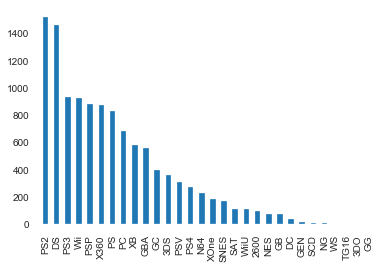

In [170]:
games2['Platform'].value_counts().plot.bar()

* El resultado que obtenemos es que como plataforma con mayor cantidad de videojuegos es la PlayStation 2 lo cual supera mas de los 1400 juegos totales de consolas, esto se debe a que muchos de los videojuegos historicamente fueron lanzados para PS2, lo cual el mercado y distribucion al nivel mundial hizo que fuera una plataforma (consola) facil de comprar videojuegos. Asi mismo tenemos como segundo lugar al Nintendo DS con mayores ventas a pesar de ser una consola portatil. La razones se ventas de videojuegos y popularidad de consolas se debe a que tan variado es el catalogo de las plataformas. Si tenemos una consola de 3D0 o GG pero no hay variedad en videojuegos el exito no es positivo asi como se puede ver en el histograma, ya que son casi nulas.

2. Para esta grafica de tipo scatter plot vamos a intentar observar el comportamiento de como son las ventas de la empresa segun su consola tomando en cuenta la cantidad total de ventas en Japon y su plataforma correspondiente.

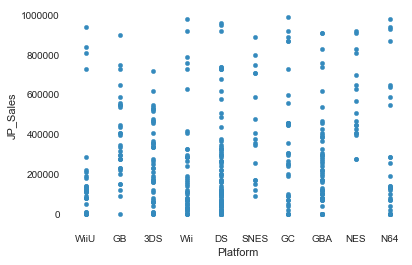

In [100]:
Nintendo[Nintendo['JP_Sales'] < 1000000].plot.scatter(x='Platform', y='JP_Sales')


* Lo que podemos observar es que la cantidad de ventas por consolas, esto como la plataforma con ventas mayores a 10 millones, el cual es una plataforma que tiene ventas mas altas. La consola DS podemos observar que tiene tanto ventas muy bajas como muy altas, esto a ver la cantidad de juegos de Nintendo como juegos exclusivos si pueden afectar las ventas y tener criticas bajas. 

3. En este grafico scatter plot, vamos a intentar de ver como la empresa Capcom ve distribuida el año con su criticas, esto estara dada por la cantidad de criticas o sea que la cantidad de criticas con dicha calificacion de videojuegos un cierto año tomando en cuenta ventas de Estados Unidos, con ventas menores 2 millones una muestra de 100 elementos de la Base de Datos y utilizando en los ejes X= Year of Release y Y= Critic Score.

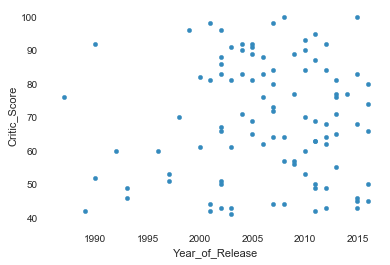

In [99]:
Capcom[Capcom['EU_Sales'] < 2000000].sample(100).plot.scatter(x='Year_of_Release', y='Critic_Score')

* El Resultado que obtenemos es que apartir del añ0 2000 vemos que existen mas ventas de videojuegos esto por la competencia de Plataformas y de empresas desarrolladoras de videojuegos, por lo que existen mas juegos, mas variedad de consolas y catalogos mas amplios de donde escoger. En este caso otro factor es que apartir de ese año empiezan a ver servicio en linea y paginas de videojuegos de criticas lo cual las personas o consumidores podian tener mas acceso sobre informacion de videojuegos. A comparacion de finales de los 80s y 90s solo se daban en foros, reuniones, publicaciones o revistas a comparacion de años posteriores al 2000.

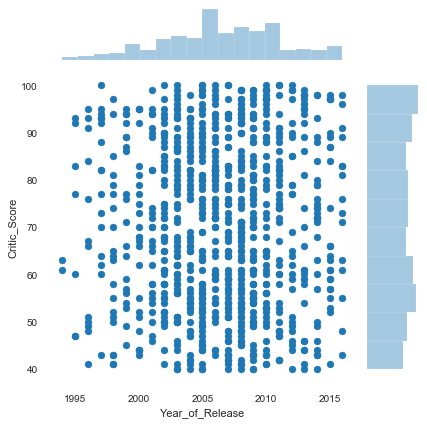

In [93]:
sn.jointplot(x=EA['Year_of_Release'], y=EA['Critic_Score'], kind="scatter")

4. Para una genero especifico en este caso Carreras, vamos a ver como se distribuye con este histograma la cantidad de videojuegos lanzados segun la plataforma. Para este caso vamos a utilizar la columna de Platform donde se hara el conteo de juegos por consola.

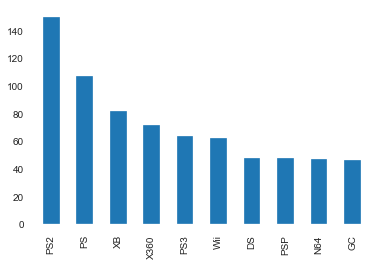

In [110]:
Carreras['Platform'].value_counts().head(10).plot.bar()

* Como resultado obtenemos que como consola con mayor cantidad de videojuegos lanzados es PlayStation 2 (PS2), esto se debe a los siguiente, la consola de PS2 fueron lanzados demasiados videojuegos, de todos lo generos, se puede decir que fue una plataforma en la cual tuvo uno de los catalagos mas amplios del mercado historicamente.  

4. En esta grafica analizaremos las ventas en Norte America de la empresa SNK, vamos a visualizar como se fueron dando las ventas segun la critica. El resultado que queremos obtener es el año de mayor popularidad de la empresa SNK y observaremos su resultado.

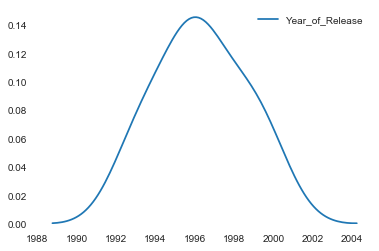

In [29]:
sn.kdeplot(SNK.query('Critic_Score <100').Year_of_Release)

* EL resultado que se observa es que en el año de mayor venta es el de 1996 lo cual, con informacion oficial historica, SNK empezo a ganar popularidad a principios de los años 90s con juegos como Metal Slug y The king of Fighters 94, el punto maximo como se oberva es que fue un año excelente en 1996, teniendo en cuenta que en ese año se lanzo The King of Fighters 96, un juego con mucha popularidad. Como se explica la caida?. Bien despues de lanzar algunos videojuegos de la misma franquicia de The King of Fighters y Metal Slug, SNK empezo a tener problemas, ya que carecian un poco de originalidad, jugabilidad, cosa que casi SNK casi se declaraba en bancarrota. Esto casi terminaba con sus franquicias y fue un año de muchas perdidas. SNK tuvo que unirse con PLAYMORE para empezar trabajar juntos y tratar de que SNK no dejara de exisitir. The king of Fighters 2002 ya no sale como empresa SNK si no como PLAYMORE.

5. Veremos como el The King of Fighters 96 con un histograma se ve reflajado el exito de SNK, haciendolo tomando en cuenta la cantidad de frecuencia de este videojuego con la columna Name.

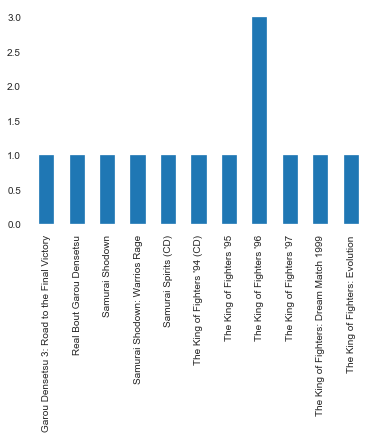

In [77]:
SNK['Name'].value_counts().sort_index().plot.bar()

* El resultado que obtenemos, es que observamos que The King of Fighters 96 que frecuenta 3 veces, tanto en ventas y como mayor cantidad de consolas que salio como Neo Geo, PS y Sega Saturno. Las ventas son mas grandes si la distribucion de lanzamiento de un videojuego sale para mas consolas, tomando en cuenta las consolas con las que salio y las ventas, es la razon de que este juego halla obtenido una venta grande.